In [11]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)2
n = 5  # n in head(n) determine the numbers of rows to read
dataframes1 = pd.read_csv('Small_Reviews.csv') # plain untouch csv as dataframes1

In [12]:
# plotly.graph_objects as go
list_of_scores = dataframes1.groupby(['Score'])['Score'].count() # extracting the data and count the nunbers of the rating
#print(list_of_scores)
print(dataframes1['Score'] != 3) # check if score is more than 3
graph1 = go.Figure(data=go.Bar(x=[1,2,3,4,5], y=list_of_scores))
graph1.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
graph1.update_layout(title_text='Product Score')
graph1.show()

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149     True
Name: Score, Length: 150, dtype: bool


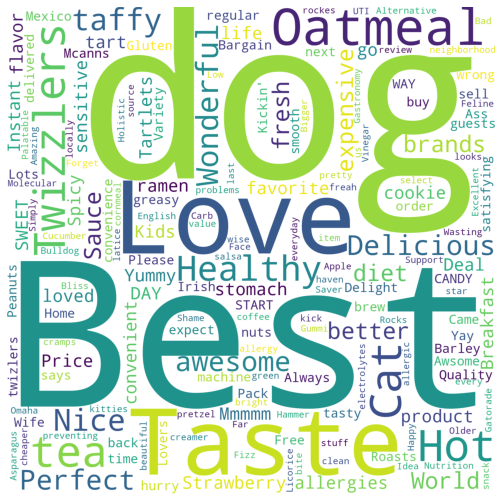

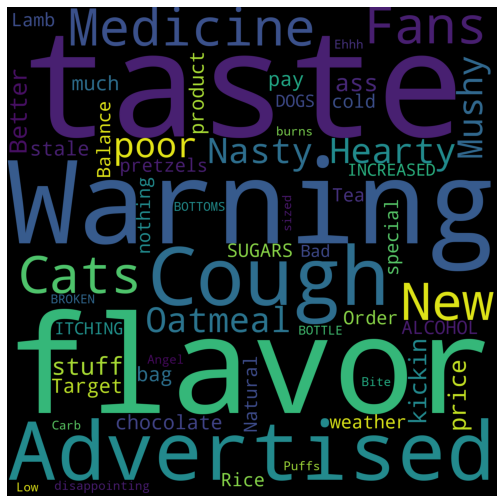

In [13]:
    
    # Split the csv into two positive and negetive csv
    # Applying lambda function to find 
    dataframes1['sentiment'] = dataframes1['Score'].apply(lambda rating : +1 if rating > 3 else -1)
    positive_dataframes1 = dataframes1[dataframes1['sentiment'] == 1]
    negetive_dataframes1 = dataframes1[dataframes1['sentiment'] == -1]

# Postive Word Cloud
    stopwords.update(["br", "href","good","great", "food"]) # For excluding words
    positive_token_words = " ".join(review for review in positive_dataframes1.Summary)
    positive_wordcloud = WordCloud(width = 1600, height = 1600, background_color ='white', stopwords = stopwords, 
                min_font_size = 10).generate(positive_token_words) 
    plt.figure(figsize = (9, 9), facecolor = None) 
    plt.imshow(positive_wordcloud)
    plt.axis("off") # off the pixel axis
    plt.show()

# Negetive Word Cloud
    stopwords.update(["br", "href","good","great","food"]) # For excluding words
    negetive_token_words = " ".join(review for review in negetive_dataframes1.Summary)
    negetive_wordcloud = WordCloud(width = 1600, height = 1600, background_color ='black', stopwords = stopwords, 
                min_font_size = 10).generate(negetive_token_words) 
    plt.figure(figsize = (9, 9), facecolor = None) 
    plt.imshow(negetive_wordcloud)
    plt.axis("off") # off the pixel axis
    plt.show()